   # ![F1](https://static2.gazeta.ua/img2/cache/preview/806/806404_w_300.jpg?v=0)



# Анализ данных 'Формула-1'

## В этом анализе мы будем использовать четыре общедоступных набора данных автогонок 'Формула-1', которые содержат информацию с 1950-го года по сезон 2022-го года.

In [218]:
# Импортируем все библиотеки,которые потребуются для анализа

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [243]:
# Загрузим данные и назначим имена столбцов

df_results = pd.read_csv('results.csv', names = ['result_id','race_id','driver_id','constructor_id','number','grid','position','position_text','position_order','points','laps','time','milliseconds','fastest_lap','rank','fastest_lap_time','fastest_lap_speed','status_id'], header = None)
df_races = pd.read_csv('races.csv', names = ['race_id','year','round','circuit_id','name','date','time','url'], header = None)
df_drivers = pd.read_csv('drivers.csv', names = ['driver_id','driver_ref','number','code','forename','surname','dob','nationality','url'], header = None)
df_constructors = pd.read_csv('constructors.csv',names = ['constructor_id','constructor_ref','name','nationality','url'], header = None)


In [244]:
# Объединим данные

df = pd.merge(df_results,df_races[['race_id','year', 'name','round']],on='race_id', how='left')
df = pd.merge(df,df_drivers[['driver_id','driver_ref', 'nationality']],on='driver_id', how='left')
df = pd.merge(df,df_constructors[['constructor_id', 'name','nationality']],on='constructor_id', how='left')

## Очистка данных

In [245]:
# Удалым ненужные столбцы

df.drop(['number','position','position_text','laps','fastest_lap','status_id','result_id','race_id','driver_id','constructor_id'],axis=1,inplace=True)

In [246]:
# Переимнуем некоторые столбцы

df.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x': 'driver_nationality',
                 'name_y':'constructor_name','nationality_y': 'constructor_nationality','driver_ref':'driver'},inplace = True)

In [247]:
# Изменим порядок столбцов

df = df[['year','gp_name','round','driver','constructor_name','grid','position_order','points',
         'time','milliseconds','fastest_lap_rank','fastest_lap_time','fastest_lap_speed','driver_nationality','constructor_nationality']]

In [226]:
# Удалим данные сезона '2022', так как он не завершился

df = df[df['year']!=2022]

In [227]:
# Отсортируем значения
df = df.sort_values(by=['year','round','position_order'],ascending = [False, True, True])

In [248]:
# Заменим значения '\\N' в столбцах времени на nan, потому что время не было зарегистрировано, когда гонщик не закончил гонку 
# или был обойден другим гонщиком

df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)


# Изменим типы данных для удобной работы со значениями

df['year'] = pd.to_numeric(df['year'], errors = 'coerce').astype('Int64')
df['round'] = pd.to_numeric(df['round'], errors = 'coerce').astype('Int64')
df['grid'] = pd.to_numeric(df['grid'], errors = 'coerce').astype('Int64')
df['position_order'] = pd.to_numeric(df['position_order'], errors = 'coerce').astype('Int64')
df['round'] = pd.to_numeric(df['round'], errors = 'coerce').astype('Int64')
df['points'] = pd.to_numeric(df['points'], errors = 'coerce')
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors = 'coerce')
df['fastest_lap_rank'] = pd.to_numeric(df['fastest_lap_rank'], errors = 'coerce')
df['fastest_lap_speed'] = pd.to_numeric(df['fastest_lap_speed'], errors = 'coerce')



In [ ]:
# Сбросим индекс

df.reset_index(drop = True, inplace = True)

In [171]:
# Проверим форму набора данных

print(df.shape)

(25281, 15)


In [172]:
# Проверим общее количество значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25281 entries, 0 to 25280
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25280 non-null  Int64  
 1   gp_name                  25281 non-null  object 
 2   round                    25280 non-null  Int64  
 3   driver                   25281 non-null  object 
 4   constructor_name         25281 non-null  object 
 5   grid                     25280 non-null  Int64  
 6   position_order           25280 non-null  Int64  
 7   points                   25280 non-null  float64
 8   time                     6760 non-null   object 
 9   milliseconds             6758 non-null   float64
 10  fastest_lap_rank         7031 non-null   float64
 11  fastest_lap_time         25281 non-null  object 
 12  fastest_lap_speed        6836 non-null   float64
 13  driver_nationality       25281 non-null  object 
 14  constructor_nationalit

In [173]:
# Проверим верхний набор данных

df.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,<NA>,name,<NA>,driverRef,name,<NA>,<NA>,NaN,time,NaN,NaN,fastestLapTime,NaN,nationality,nationality
1,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
2,2021,Bahrain Grand Prix,1,stroll,Aston Martin,10,10,1.0,+86.713,5610610.0,9.0,1:34.865,205.378,Canadian,British
3,2021,Bahrain Grand Prix,1,raikkonen,Alfa Romeo,14,11,0.0,+88.864,5612761.0,14.0,1:35.192,204.672,Finnish,Swiss
4,2021,Bahrain Grand Prix,1,giovinazzi,Alfa Romeo,12,12,0.0,NaN,NaN,13.0,1:35.122,204.823,Italian,Swiss
5,2021,Bahrain Grand Prix,1,ocon,Alpine F1 Team,16,13,0.0,NaN,NaN,15.0,1:35.250,204.548,French,French
6,2021,Bahrain Grand Prix,1,russell,Williams,15,14,0.0,NaN,NaN,12.0,1:35.036,205.008,British,British
7,2021,Bahrain Grand Prix,1,vettel,Aston Martin,20,15,0.0,NaN,NaN,16.0,1:35.566,203.871,German,British
8,2021,Bahrain Grand Prix,1,mick_schumacher,Haas F1 Team,18,16,0.0,NaN,NaN,18.0,1:36.134,202.667,German,American
9,2021,Bahrain Grand Prix,1,gasly,AlphaTauri,5,17,0.0,NaN,NaN,5.0,1:34.090,207.069,French,Italian


In [174]:
# Установим размер для всех графиков, которые мы создадим

sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6

## Из чего состоит наш набор данных?

#### Этот набор данных содержит данные с 1950 года (первый сезон) по сезон 2021 года и состоит из данных, описывающих результаты гонок, гонщиков, конструкторов и время прохождения круга. Имеется 25281 строчек данных и 15 столбцов. Данные содержат:
- **year :** сезон, в котором проводился Гран-при.    

- **gp_name :** название Гран-при.
- **round:**  номер гонки в каждом сезоне (например, 1 означает, что это первая гонка сезона).
- **driver:**  имя гонщика. Некоторые гонщики имеют одинаковые фамилии, в этом случае вторая встречаемость отображается как firstname_lastname (например, verstappen и max_verstappen).
- **constructor_name:** имя конструктора болида.
- **grid:** стартовая позиция перед гонкой (зависит от квалификации, которая проводится за день до гонки).
- **position_order:** итоговая позиция в конце гонки.
- **points:**  количество очков, набранных в гонке.
- **time:** количество времени, затраченного на финиш гонки. Отображается только время победителя, а гонщикам, отстающим от победителя, показывается, насколько они отстали от победителя. Если гонщик не закончил гонку или его обогнал другой гонщик, значение равно нулю.
- **milliseconds:** количество времени, которое потребовалось для завершения гонки в миллисекундах. Если гонщик не закончил гонку или его обогнал другой гонщик, значение равно null.
- **fastest_lap_rank:** порядок прохождения самого быстрого круга во время гонки.
- **fastest_lap_time:** наименьшее время, которое потребовалось для прохождения круга в гонке.
- **fastest_lap_speed:** средняя скорость на самом быстром круге.
- **driver_nationality:**  национальность водителя.
- **constructor_nationality:** страна, в которой находится конструктор автомобиля.

## Какие основыные характеристики интересуют нас в нашем наборе данных?

#### Болше всего интересно выяснить, как менялась 'Формула-1' с течением времени. Для этого мы рассмотрим:

- Какие гонщики и конструкторы были самыми успешными на протяжении всей истории спорта? 
- Как положение на стартовой позиции влияет на финишную позицию?
- Менялась ли средняя скорость автомобилей? Одинакова ли тенденция на всех трассах?
- Выступают ли определенные команды лучше на быстрых трассах по сравнению с техничными трассами?

**Наиболее важными характеристиками в моем исследовании будут: количество побед в GP, сетка, место на финише и самая высокая скорость прохождения круга.**

### Я начну с рассмотрения распределения общего количества побед в GP.

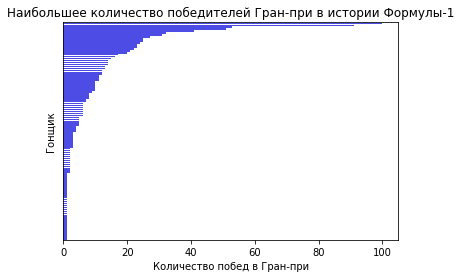

In [193]:
# Создадим новый датафрейм для всех победителей Гран-при

driver_winner = df.loc[df['position_order'] == 1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# Создадим гистограмму

sb.barplot(data = driver_winner, y = 'driver', x = 'position_order', color = 'blue', alpha = 0.8)
plt.title('Наибольшее количество победителей Гран-при в истории Формулы-1')
plt.ylabel('Гонщик')
plt.xlabel('Количество побед в Гран-при')
plt.yticks([]);




На гистограмме видно, что существует большое распределение побед в Гран-при. В истории есть лишь несколько гонщиков, которые выиграли более 20 Гран-при за свою карьеру. Большинство гонщиков, когда-либо выигрывавших Гран-при, приходили первыми в гонке только 1-2 раза. С другой стороны, мы видим, что есть гонщики, которые полностью доминировали в гонках 'Формулы-1' и выиграли более 50 Гран-при за свою карьеру. Увеличим масштаб, чтобы увидеть 10 лучших гонщиков за всю историю 'Формулы-1'.


In [191]:
# Создадим новый датафрейм для 10 лучших гонщиков всех Гран-при

top10Drivers = driver_winner.head(10)

print(top10Drivers)


               driver  position_order
0            hamilton             100
1  michael_schumacher              91
2              vettel              53
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


Это лучшие гонщики в истории 'Формулы-1' по общему количеству побед на Гран-при. Самым успешным гонщиком является британец Льюис Хэмилтон со 100 победами . Немцы Михаель Шумахер и Себастьян Феттель выиграли 91 и 53 Гран-при соответственно. Хэмилтон и Феттель - единственные в списке, которые не ушли на пенсию, но Феттель сделал заявление, что после сезона 2022-го года завершит карьеру.

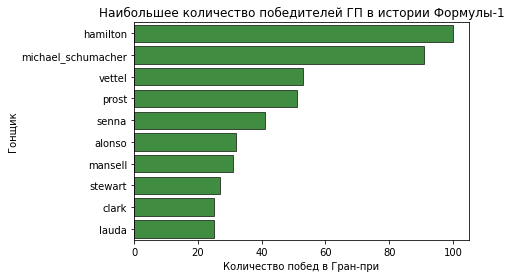

In [195]:
# Создадим гистограмму для 10 лучших гонщиков

sb.barplot(data = top10Drivers, y='driver', x='position_order', color='green', alpha=0.8, linewidth=.8,edgecolor="black")
plt.title('Наибольшее количество победителей ГП в истории Формулы-1')
plt.ylabel('Гонщик')
plt.xlabel('Количество побед в Гран-при');

#### Далее рассмотрим, насколько успешны констукторы.

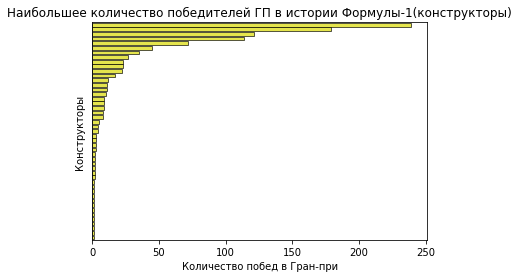

In [196]:
# Создадим новый датафрейм для всех конструкторов-победителй Гран-при

constructor_winner = df.loc[df['position_order'] == 1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# Создадим гистограмму для всех конструкторов
sb.barplot(data = constructor_winner, y = 'constructor_name', x = 'position_order',
           color = 'yellow', alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Наибольшее количество победителей ГП в истории Формулы-1(конструкторы)')
plt.ylabel('Конструкторы')
plt.xlabel('Количество побед в Гран-при')
plt.yticks([]);

Аналогичную картину мы наблюдаем и в таблице конструкторов. Есть несколько команд, которые полностью доминируют в спорте, в то время как большинство команд выиграли лишь несколько Гран-при в своей истории. Увеличим масштаб, чтобы увидеть 10 лучших конструкторов в истории 'Формулы-1'.

In [198]:
# Создадим новый датафрейм для 10 лучших конструкторв в истории 'Формулы-1'

top10Constructors = constructor_winner.head(10)

print(top10Constructors)

  constructor_name  position_order
0          Ferrari             239
1          McLaren             179
2         Mercedes             121
3         Williams             114
4         Red Bull              72
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


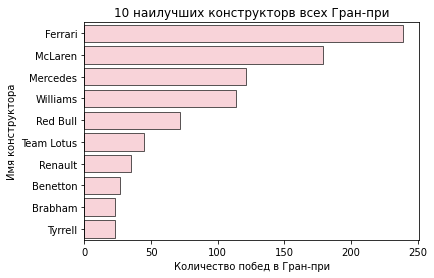

In [199]:
# Создадим гистограмму для 10 лучших конструкторов

sb.barplot(data = top10Constructors, y='constructor_name',x='position_order', color='pink',alpha=0.8,linewidth=.8,edgecolor='black')

plt.title('10 наилучших конструкторв всех Гран-при')
plt.ylabel('Имя конструктора')
plt.xlabel('Количество побед в Гран-при');

Самой успешной командой является итальянская Ferrari с 239 победами на Гран-при. Далее следуют британская McLaren со 179 победами, немецкая Mercedes со 121 победами и британская Williams cо 114 победами. Несмотря на то, что у итальянских конструкторов наибольшее количество побед, британские и немецкие конструкторы/гонщики являются самыми результативными.  

Распределение было большим как в наборе данных по гонщикам, так и по конструкторам. Было мало гонщиков/конструкторов, которые выигрывали Гран-при много раз, в то время как большинство гонщиков приходили первыми лишь несколько раз. После увеличения масштаба 10 лучших результатов мы увидели, насколько далеко впереди находятся ведущие конкуренты.

### В этом разделе мы рассмотрим взаимосвязь между стартовой и финишной позицией. Кроме того,  исследуем, как менялась скорость со временем на разных треках.

In [200]:
# Изменим типы данных для удобной работы со значениями

df['grid']=df['grid'].astype(float)
df['position_order']=df['position_order'].astype(float)


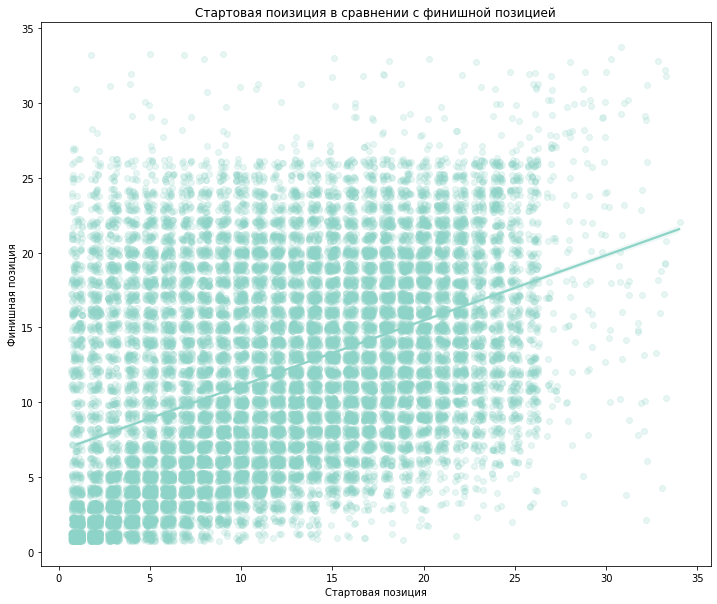

In [203]:
# Исключим точки данных, где grid = 0, потому что это искажает данные. '0' означает, что гонщик стартовал с пит-лейн(часть
# гоночной трассы, на которой располагаются боксы команд, участвующих в гонке.)

df_no_zero = df[df['grid']!=0]
                
# Создадим график

plt.figure(figsize = [12, 10])
sb.regplot(data = df_no_zero, x = 'grid', y = 'position_order', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('Стартовая поизиция в сравнении с финишной позицией')
plt.ylabel('Финишная позиция')
plt.xlabel('Стартовая позиция');  


На графике мы видим линейную зависимость между стартовой и финишной позицией. 
Мы также видим, что в большинстве гонок участвовало до 25 гонщиков, а в некоторых из них даже более 30.

Далее рассмотрим, менялась ли скорость автомобилей с годами. 
Поскольку эти данные доступны только с сезона 2004  года, мы будем рассматривать только эти годы.

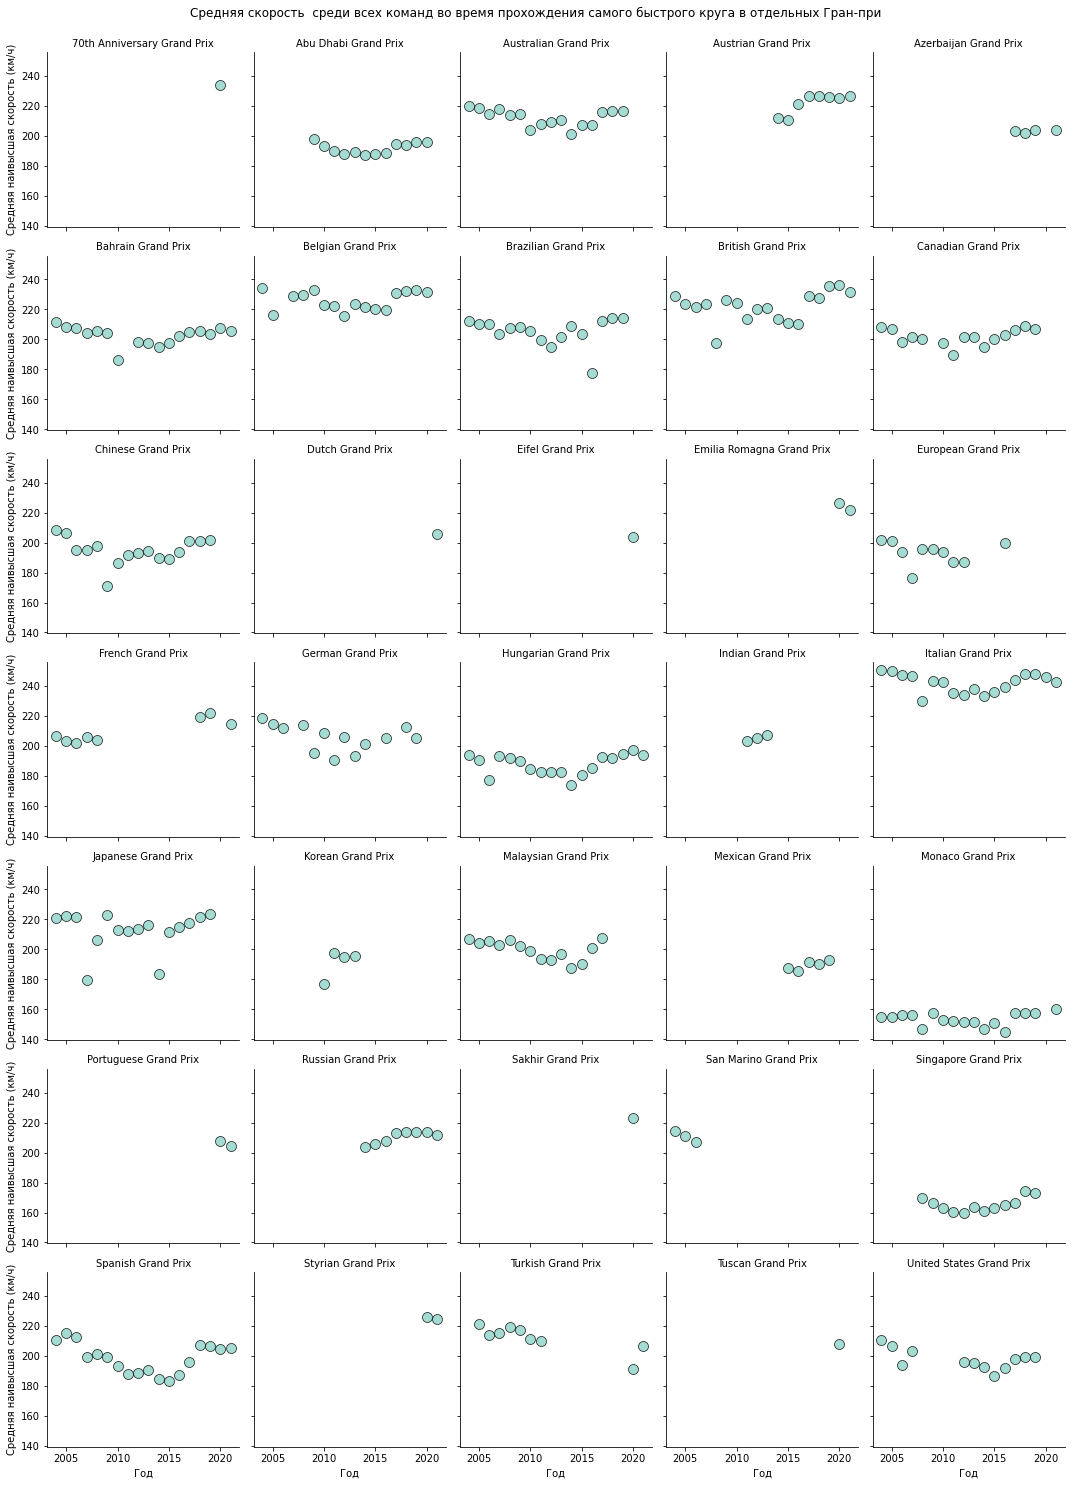

In [209]:
# Создадим новый датафрейм, начиная с сезона 2004 года

df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

# Создадим сетку 
g = sb.FacetGrid(data = df_group_speed, col = 'gp_name',col_wrap=5)
g.map(plt.scatter, 'year','fastest_lap_speed', alpha = 0.8, linewidth=.8, edgecolor="black", s = 100 )
g.set_titles("{col_name}")
g.set_xlabels('Год')
g.set_ylabels('Средняя наивысшая скорость (км/ч)')
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Средняя скорость  среди всех команд во время прохождения самого быстрого круга в отдельных Гран-при');

В целом, мы видим снижение средней скорости прохождения круга с 2004 по 2015 год почти на всех трассах. С 2015 года скорость снова начала возвращаться к значениям 2004 года.

На некоторых Гран-при наблюдаются резкие изменения среднего значения самого быстрого круга, связанные с переездом на другое место (например, в 2007 и 2008 годах японский Fuji Speedway заменил японский Suzuka или модификациями трассы (в сезоне 2007 года первый из двух финальных свиперов был заменен медленной шиканой в попытке улучшить обгоны ).

Мы также видим, что скорость на каждой трассе очень разная. Например, Гран-при Италии - самая быстрая гонка в календаре: средняя скорость превышает 240 км/ч. С другой стороны, Монако - самая медленная гонка со средней скоростью менее 160 км/ч. Это было ожидаемо, поскольку Гран-при Монако проходит на узких улицах города.

Сезон 2020 и 2021 годов был несколько иным из-за последствий вируса Ковид-19. 'Формула-1' сильно пострадала, так что начало сезона было перенесено на несколько месяцев позже. Последствия пандемии продолжались на протяжении этих сезонов, поэтому некоторые популярные гонки были отменены и исключены из первоначального календаря, заменены другими, чтобы сохранить количество гонок. Кроме того, некоторые гонщики подхватили вирус перед каким-то гоночным уик-эндом, что сделало невозможным их присутствие на стартовой решетке.



### В этом разделе мы проанализируем разницу в скоростях команд в Гран-при  Италии и Монако. Мы попытаемся понять, являются ли некоторые команды лучше других на разных трассах.

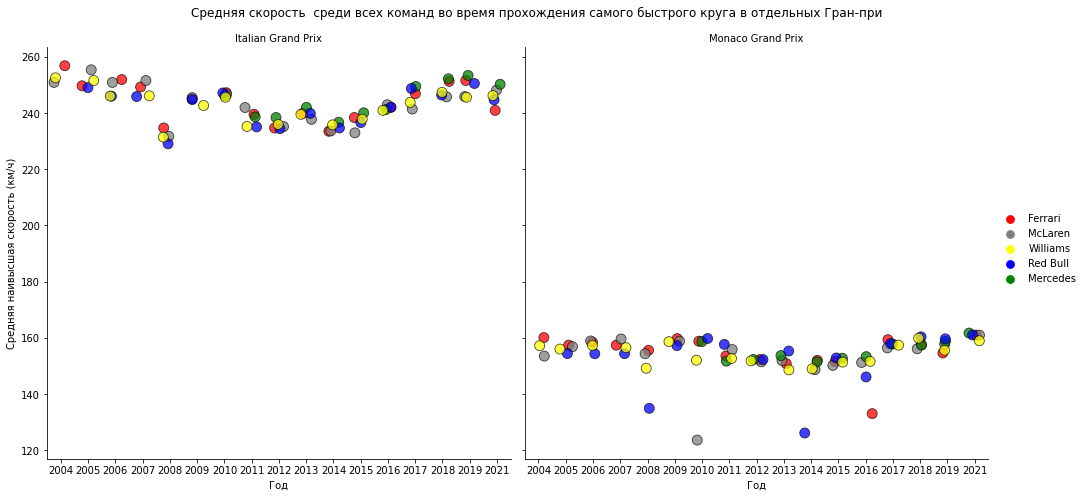

In [212]:
# Создадим новый датафрейм для Гран-при Монако и Италии после 2004 года с наиболее популярными командами.

df_it_mon = df[(df['year'] >= 2004) 
               & ((df['constructor_name'] == 'McLaren') | (df['constructor_name'] == 'Williams')
               | (df['constructor_name'] == 'Ferrari') | (df['constructor_name'] == 'Red Bull')
               | (df['constructor_name'] == 'Mercedes'))
               & ((df['gp_name'] == 'Monaco Grand Prix') | (df['gp_name'] == 'Italian Grand Prix'))]
df_speed_constructor = df_it_mon.groupby(['gp_name', 'year','constructor_name'])['fastest_lap_speed'].mean().to_frame().reset_index()

# Присвоим цвета командам
my_pal = {"Ferrari": "red", "McLaren": "grey", "Williams":"yellow","Red Bull":"blue","Mercedes":"green"}

# Создадим сетку
g = sb.FacetGrid(data = df_speed_constructor, col = 'gp_name', height = 7)
g.map(sb.stripplot, 'year', 'fastest_lap_speed',
      hue = df_speed_constructor['constructor_name'],
      alpha = 3/4, jitter = 0.25, s = 10, linewidth=.8, edgecolor="black", order = None, palette=my_pal)
g.set_titles("{col_name}")
g.set_xlabels('Год')
g.set_ylabels('Средняя наивысшая скорость (км/ч)')
g.add_legend()
plt.subplots_adjust(top=0.90)
g.fig.suptitle('Средняя скорость  среди всех команд во время прохождения самого быстрого круга в отдельных Гран-при');

В целом, мы не заметили большой разницы в производительности основных команд на разных трассах. Кажется, что если машина быстра в скоростной гонке, например, в Италии, то она должна быть быстра и на более техничной трассе, например, в Монако. Например, McLaren был одним из самых быстрых автомобилей как в Италии, так и в Монако с 2005 по 2011 год. С другой стороны, Red Bull, который полностью доминировал в спорте в сезонах 2010-2013  был не очень быстр в Италии в эти годы. Однако в высокотехничном Монако он был самым быстрым автомобилем на трассе.

Одна из причин, которая может объяснить это, заключается в том, что некоторые гонщики предпочитают разные трассы. Следовательно, они лучше выступают на своих любимых трассах. Другой причиной может быть тот факт, что эти два Гран-при проходят с разницей в несколько месяцев друг от друга, поэтому у инженеров есть много времени для улучшения машин между гонками.

Мы заметили, что на Гран-при Монако наблюдаются странные медленные скорости прохождения круга, которых нет в Италии. Можем предположить, что это связано с гонщиками, которые не закончили гонку из-за аварий. Это имеет смысл, потому что трасса в Монако имеет очень маленький предел погрешности, поэтому у гонщиков больше шансов попасть в аварию и не закончить гонку, чем в гонках, где трасса шире, например, в Италии.